In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/weatherdataz.csv')

In [ ]:
data

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73.0,9.5,82.0,partly cloudy,1010.82,2.0,Winter,3.5,inland,Rainy
1,39.0,96.0,8.5,71.0,partly cloudy,1011.43,7.0,Spring,10.0,inland,Cloudy
2,30.0,64.0,7.0,16.0,clear,1018.72,5.0,Spring,5.5,mountain,Sunny
3,38.0,83.0,1.5,82.0,clear,1026.25,7.0,Spring,1.0,coastal,Sunny
4,27.0,74.0,17.0,66.0,overcast,990.67,1.0,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.duplicated().sum()

9

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.isnull().sum()

,0
Temperature,1
Humidity,1
Wind Speed,1
Precipitation (%),1
Cloud Cover,1
Atmospheric Pressure,1
UV Index,1
Season,1
Visibility (km),1
Location,1


In [ ]:
data.dropna(inplace=True)

In [ ]:
data

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73.0,9.5,82.0,partly cloudy,1010.82,2.0,Winter,3.5,inland,Rainy
1,39.0,96.0,8.5,71.0,partly cloudy,1011.43,7.0,Spring,10.0,inland,Cloudy
2,30.0,64.0,7.0,16.0,clear,1018.72,5.0,Spring,5.5,mountain,Sunny
3,38.0,83.0,1.5,82.0,clear,1026.25,7.0,Spring,1.0,coastal,Sunny
4,27.0,74.0,17.0,66.0,overcast,990.67,1.0,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74.0,14.5,71.0,overcast,1003.15,1.0,Summer,1.0,mountain,Rainy
13196,-1.0,76.0,3.5,23.0,cloudy,1067.23,1.0,Winter,6.0,coastal,Snowy
13197,30.0,77.0,5.5,28.0,overcast,1012.69,3.0,Autumn,9.0,coastal,Cloudy
13198,3.0,76.0,10.0,94.0,overcast,984.27,0.0,Winter,2.0,inland,Snowy


In [ ]:
data['Weather Type'].value_counts()

,count
Weather Type,
Rainy,3300
Cloudy,3300
Sunny,3300
Snowy,3300


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize a dictionary to store LabelEncoders for each column
label_encoders = {}

# List of columns to encode
categorical_columns = ['Weather Type', 'Cloud Cover', 'Season', 'Location']

# Apply LabelEncoder to each column
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Store the encoder for later use


# Display the encoded dataset
print("\nEncoded Dataset:\n", data.head())



Encoded Dataset:
    Temperature  Humidity  Wind Speed  Precipitation (%)  Cloud Cover  \
0         14.0      73.0         9.5               82.0            3   
1         39.0      96.0         8.5               71.0            3   
2         30.0      64.0         7.0               16.0            0   
3         38.0      83.0         1.5               82.0            0   
4         27.0      74.0        17.0               66.0            2   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82       2.0       3              3.5         1   
1               1011.43       7.0       1             10.0         1   
2               1018.72       5.0       1              5.5         2   
3               1026.25       7.0       1              1.0         0   
4                990.67       1.0       3              2.5         2   

   Weather Type  
0             1  
1             0  
2             3  
3             3  
4             1  


In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data[['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)','Cloud Cover', 'Season', 'Location',
                       'Atmospheric Pressure', 'UV Index', 'Visibility (km)',]]
y = data['Weather Type']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
from sklearn.preprocessing import StandardScaler

# Apply StandardScaler to numeric columns
scaler = StandardScaler()
X[['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']] = scaler.fit_transform(X[['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']])


<ipython-input-102-e167918fc166>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']] = scaler.fit_transform(X[['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']])


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)



Model Accuracy: 0.9125


In [ ]:

new_data = pd.DataFrame({
    'Temperature': [20.0],
    'Humidity': [85],
    'Wind Speed': [15.0],
    'Precipitation (%)': [90.0],
    'Cloud Cover': ['clear'],
    'Season': ['Spring'],
    'Location': ['inland'],
    'Atmospheric Pressure': [1005.0],
    'UV Index': [1],
    'Visibility (km)': [3.0]
})

# Encode the categorical columns in the new data
new_data_encoded = new_data.copy()
for col in ['Cloud Cover', 'Season', 'Location']:
    new_data_encoded[col] = label_encoders[col].transform(new_data[col])

# Predict with the trained model
numeric_prediction = rf_classifier.predict(new_data_encoded)

# Decode the prediction for `Weather Type`
decoded_prediction = label_encoders['Weather Type'].inverse_transform(numeric_prediction)

# Display the results
print("\nPredicted Weather Type:", decoded_prediction[0])



Predicted Weather Type: Sunny


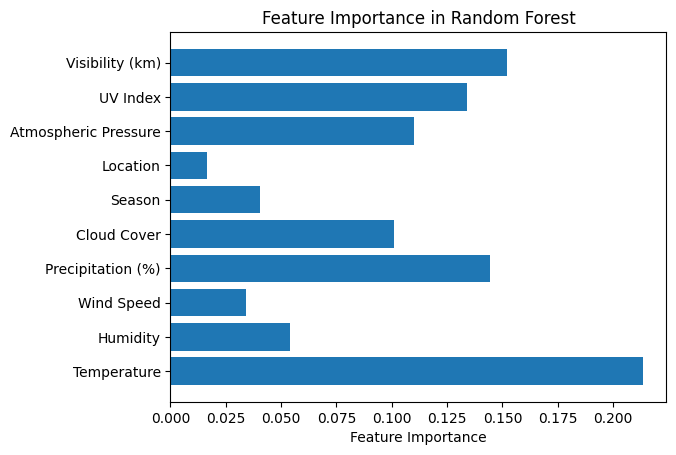

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Plot feature importances
importances = rf_classifier.feature_importances_
features = X.columns

plt.barh(features, importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest')
plt.show()


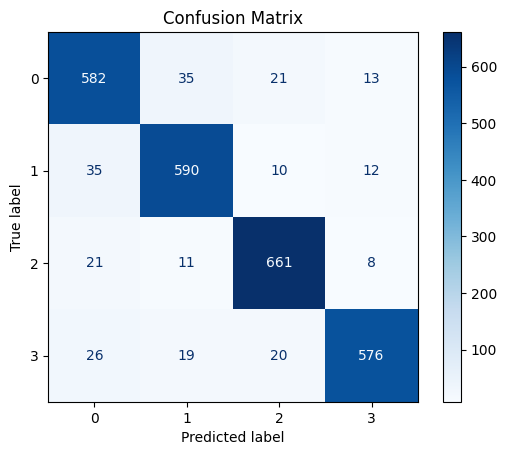

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=rf_classifier.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()
